## Threading, Multiprocessing

multi-threading : 같은 프로세스 번호  

In [1]:
import threading
import time
import os

def hello(s):
    print("Function start! {}, pid: {}, thread id: {}".format(s, os.getpid(), threading.get_ident()))
    time.sleep(1)
    
t1 = threading.Thread(target=hello, args=['Thread t1'])
t2 = threading.Thread(target=hello, args=['Thread t2'])
t1.start()
t2.start()
t1.join()
t2.join()

Function start! Thread t1, pid: 21272, thread id: 123145555161088
Function start! Thread t2, pid: 21272, thread id: 123145560416256


multi-processing : 다른 프로세스 번호

In [2]:
import multiprocessing
import time
import os

def hello(s):
    print("Function start! {}, pid: {}, thread id: {}".format(s, os.getpid(), threading.get_ident()))
    time.sleep(1)
    
p1 = multiprocessing.Process(target=hello, args=['Process p1'])
p2 = multiprocessing.Process(target=hello, args=['Process p2'])
p1.start()
p2.start()
p1.join()
p2.join()

Function start! Process p1, pid: 23857, thread id: 4533607872
Function start! Process p2, pid: 23858, thread id: 4533607872


In [3]:
multiprocessing.cpu_count()

8

ThreadPoolExecutor : a pool of threads to execute calls asynchronously  
ProcessPoolExecutor : a pool of processes to execute calls asynchronously

process pool, thread pool 을 사용하여 멀티 프로세스/스레드 구현

multi-threading started workers: 4
Function start! 0, pid: 21272, thread id: 123145556770816
Function start! 1, pid: 21272, thread id: 123145562025984
Function start! 2, pid: 21272, thread id: 123145567281152
Function start! 3, pid: 21272, thread id: 123145572536320
multi-processing started workers: 4
Function start! 0, pid: 34006, thread id: 4533607872Function start! 1, pid: 34007, thread id: 4533607872Function start! 2, pid: 34008, thread id: 4533607872Function start! 3, pid: 34009, thread id: 4533607872





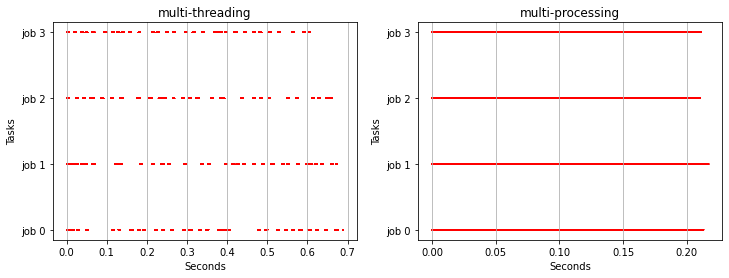

In [4]:
import os, time, threading
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import matplotlib.pyplot as plt
import numpy as np

printlock = threading.Lock()

def multithreading(func, args, workers):
    print("multi-threading started workers:", workers)
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

def multiprocessing(func, args, workers):
    print("multi-processing started workers:", workers)
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

def live_tracker(x):
    with printlock:
        print("Function start! {}, pid: {}, thread id: {}".format(x, os.getpid(), threading.get_ident()))
    reference = time.time()
    l = []
    for i in range(10**6):
        l.append(time.time() - reference)
    return l

def visualize_live_runtimes(results, title):
    for i, exp in enumerate(results):
        plt.scatter(exp, np.ones(len(exp)) * i, alpha=0.8, c='red', edgecolors='none', s=1)
        
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.xlabel("Seconds")
    plt.title(title)
    
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
visualize_live_runtimes(multithreading(live_tracker, range(4), 4), "multi-threading")
plt.subplot(1, 2, 2)
visualize_live_runtimes(multiprocessing(live_tracker, range(4), 4), "multi-processing")
plt.show()

#### concurrency vs. parallelism  

multi-threading : concurrency, 하나의 cpu를 여러개의 스레드가 시간을 번갈아 할당하여 사용 (0.7초에 작업들이 끝남)  
multi-processing : parallelism, 모든 프로세스가 cpu를 각각 할당 받아 사용 (0.2초에 작업들이 끝남)  